In [6]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv("/Users/AbdurRahman/Downloads/movies.csv")

In [13]:
# Now let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [15]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)*100))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [ ]:
#Data Cleaning 

In [20]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [44]:
#NaN values cannot be stored in integer arrays.

#Change data type of following columns

df['budget'] = df['budget'].fillna(0)

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].fillna(0)

df['gross'] = df['gross'].astype('int64')


In [134]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,Year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2254,162.0,271,3078
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1607,181.0,222,925
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2254,194.0,291,3088
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1541,138.0,271,3080
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1607,149.0,221,1025


In [125]:
df = df.sort_values(by=['gross'], inplace = False, ascending= False)

In [126]:
pd.set_option('display.max_rows', None)

In [135]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,Year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2254,162.0,271,3078
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1607,181.0,222,925
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2254,194.0,291,3088
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1541,138.0,271,3080
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1607,149.0,221,1025


<AxesSubplot:>

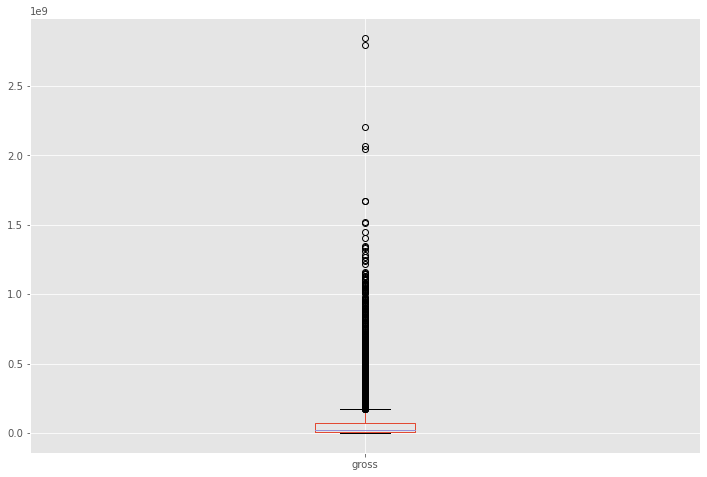

In [80]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [136]:
#Drop any duplicates

df.drop_duplicates().head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,Year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2254,162.0,271,3078
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1607,181.0,222,925
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2254,194.0,291,3088
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1541,138.0,271,3080
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1607,149.0,221,1025


In [75]:
#Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [78]:
#Finding Correlations in the Data 

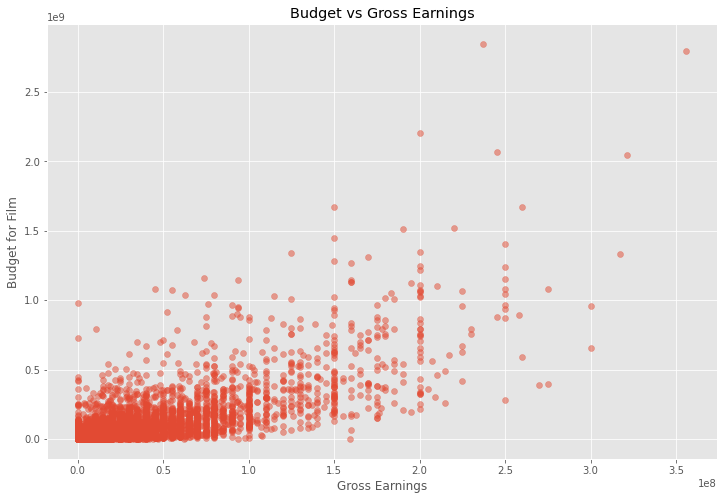

In [85]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

In [83]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"8, 20"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"9, 19"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"8, 20"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<AxesSubplot:xlabel='gross', ylabel='budget'>

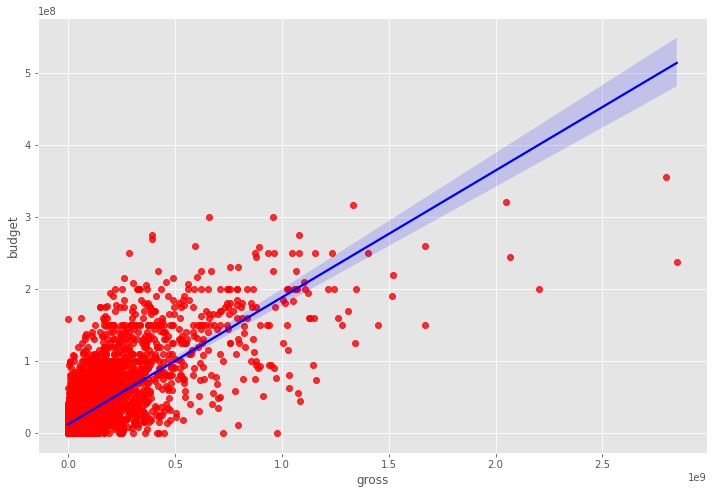

In [89]:
#Plot budget vs gross using seaborn
 
sns.regplot(x="gross", y="budget", data=df, scatter_kws ={"color":"red"}, line_kws ={"color":"blue"})

<AxesSubplot:xlabel='score', ylabel='gross'>

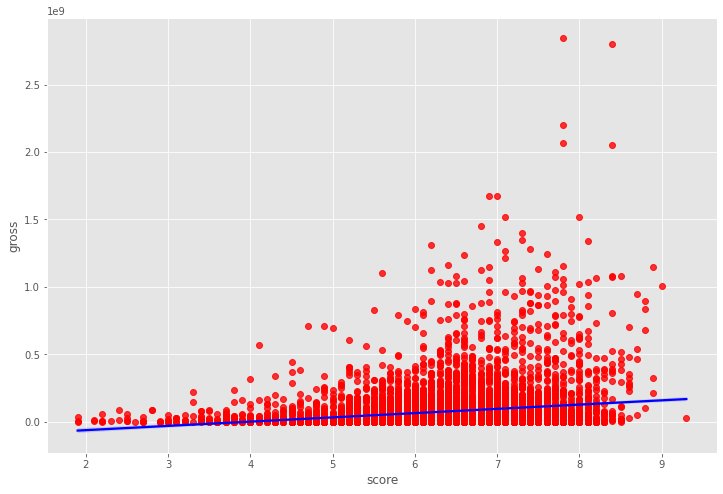

In [91]:
#Plot score vs gross using seaborn
sns.regplot(x="score", y="gross", data=df, scatter_kws ={"color":"red"}, line_kws ={"color":"blue"})

In [92]:
# Correlation Matrix between all numeric columns
# Different types of Correlation used to check the difference

df.corr(method ='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [93]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.216595,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000


In [94]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.314681,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.752265,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.716816,0.246748
gross,0.314681,0.132569,0.752265,0.716816,1.000000,0.256783
runtime,0.142977,0.399857,0.290159,0.246748,0.256783,1.000000


In [95]:
#High correlation between budget and gross. 

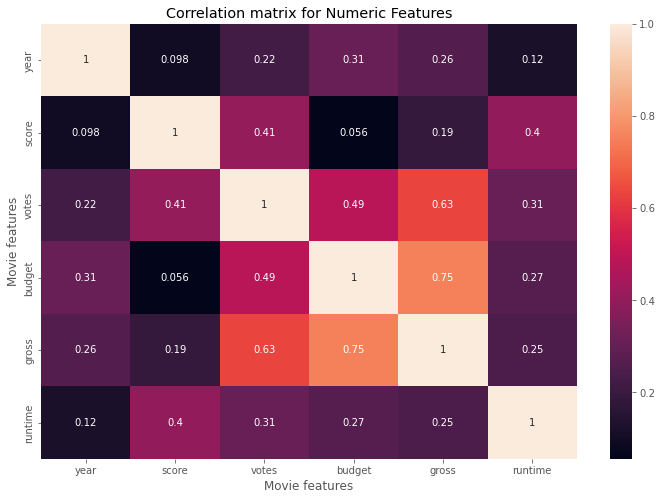

In [98]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [99]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.303939,0.138367,0.253906,0.654708,0.107033,0.595709,0.720119,0.782765,0.652683,0.190638,0.111217,0.978147,0.682797,0.071772,0.286627
rating,0.303939,1.000000,-0.012156,0.037943,0.237091,-0.065634,0.118612,0.235155,0.256080,0.243749,0.158906,0.087313,0.310789,0.278813,0.033214,0.072143
genre,0.138367,-0.012156,1.000000,0.087977,0.091335,0.063222,0.148546,0.093457,0.088163,0.098061,-0.073897,0.101274,0.134001,0.059056,0.005585,0.083979
year,0.253906,0.037943,0.087977,1.000000,0.316020,0.076737,0.326475,0.173235,0.212293,0.227655,-0.053654,0.060244,0.266957,0.121289,0.032916,0.499724
released,0.654708,0.237091,0.091335,0.316020,1.000000,0.069218,0.450235,0.502899,0.547861,0.476127,0.162192,0.081224,0.668367,0.465426,0.048272,0.367334
score,0.107033,-0.065634,0.063222,0.076737,0.069218,1.000000,0.233438,0.149666,0.103866,0.106351,-0.098455,0.001150,0.113338,0.036171,0.035609,0.067101
votes,0.595709,0.118612,0.148546,0.326475,0.450235,0.233438,1.000000,0.495005,0.521115,0.451158,0.050876,0.038523,0.611780,0.390203,0.067696,0.298194
director,0.720119,0.235155,0.093457,0.173235,0.502899,0.149666,0.495005,1.000000,0.696031,0.580146,0.197110,0.043335,0.737284,0.614151,0.080150,0.199501
writer,0.782765,0.256080,0.088163,0.212293,0.547861,0.103866,0.521115,0.696031,1.000000,0.589832,0.201882,0.064136,0.797703,0.616007,0.057754,0.217724
star,0.652683,0.243749,0.098061,0.227655,0.476127,0.106351,0.451158,0.580146,0.589832,1.000000,0.221251,0.064888,0.669416,0.569721,0.072543,0.236382


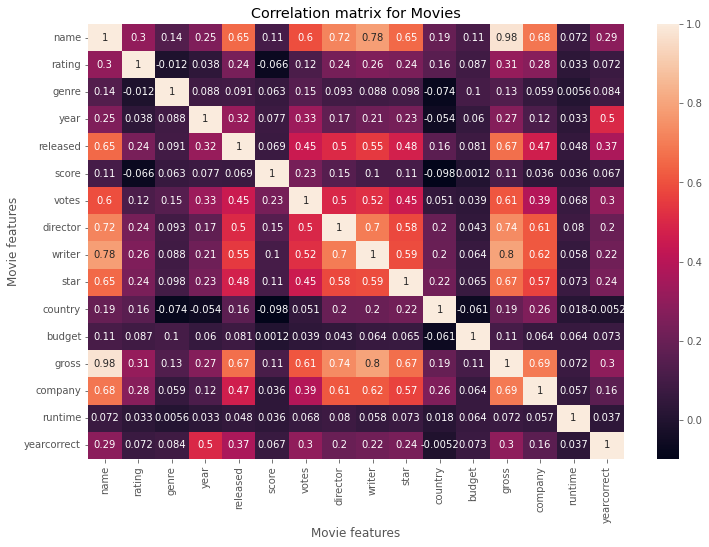

In [100]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [101]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.303939
             genre          0.138367
             year           0.253906
             released       0.654708
             score          0.107033
             votes          0.595709
             director       0.720119
             writer         0.782765
             star           0.652683
             country        0.190638
             budget         0.111217
             gross          0.978147
             company        0.682797
             runtime        0.071772
             yearcorrect    0.286627
rating       name           0.303939
             rating         1.000000
             genre         -0.012156
             year           0.037943
             released       0.237091
             score         -0.065634
             votes          0.118612
             director       0.235155
             writer         0.256080
             star           0.243749
             country        0.158906
 

In [102]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score        country       -0.098455
country      score         -0.098455
genre        country       -0.073897
country      genre         -0.073897
score        rating        -0.065634
rating       score         -0.065634
budget       country       -0.061499
country      budget        -0.061499
year         country       -0.053654
country      year          -0.053654
rating       genre         -0.012156
genre        rating        -0.012156
country      yearcorrect   -0.005233
yearcorrect  country       -0.005233
score        budget         0.001150
budget       score          0.001150
genre        runtime        0.005585
runtime      genre          0.005585
country      runtime        0.017505
runtime      country        0.017505
             year           0.032916
year         runtime        0.032916
runtime      rating         0.033214
rating       runtime        0.033214
score        runtime        0.035609
runtime      score          0.035609
company      score          0.036171
s

In [103]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

released     director       0.502899
director     released       0.502899
writer       votes          0.521115
votes        writer         0.521115
writer       released       0.547861
released     writer         0.547861
company      star           0.569721
star         company        0.569721
director     star           0.580146
star         director       0.580146
             writer         0.589832
writer       star           0.589832
votes        name           0.595709
name         votes          0.595709
votes        gross          0.611780
gross        votes          0.611780
company      director       0.614151
director     company        0.614151
company      writer         0.616007
writer       company        0.616007
name         star           0.652683
star         name           0.652683
name         released       0.654708
released     name           0.654708
gross        released       0.668367
released     gross          0.668367
star         gross          0.669416
g

In [121]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted



company
2319    56491421806
2281    52514188890
731     43008941346
1812    40493607415
2253    40257053857
2316    36327887792
1713    19883797684
1606    15065592411
887     11873612858
2232    11795832638
889     11635441081
1637     9230230105
2147     8373718838
1856     7886344526
1109     7443502667
Name: gross, dtype: int64

In [118]:
#Looks at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,271
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,222
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,291
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,271
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,221


In [137]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,Year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2254,162.0,271,3078
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1607,181.0,222,925
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2254,194.0,291,3088
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1541,138.0,271,3080
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1607,149.0,221,1025


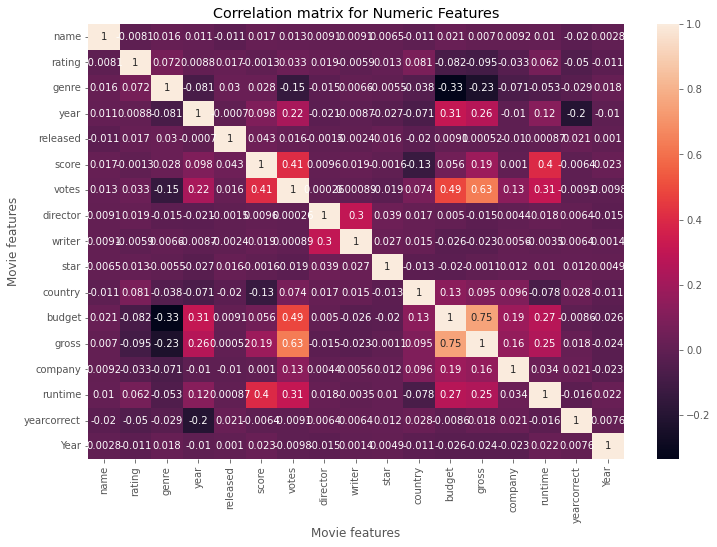

In [128]:
correlation_matrix = df_numerized.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [138]:
df_numerized.corr(method='pearson').head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,Year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.020274,0.002843
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,-0.049770,-0.011441
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.028582,0.018393
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,-0.202836,-0.010495
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,0.021491,0.001014


In [130]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.344550
             genre          0.138378
             year           0.253902
             released       0.656265
             score          0.107030
             votes          0.595717
             director       0.720108
             writer         0.782931
             star           0.653256
             country        0.193868
             budget         0.111234
             gross          0.978147
             company        0.686233
             runtime        0.071782
             yearcorrect    0.286625
             Year           0.656265
rating       name           0.344550
             rating         1.000000
             genre         -0.014784
             year           0.036004
             released       0.263754
             score         -0.069097
             votes          0.154175
             director       0.284009
             writer         0.303196
             star           0.303965
 

In [131]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score        country       -0.095521
country      score         -0.095521
             genre         -0.072434
genre        country       -0.072434
score        rating        -0.069097
rating       score         -0.069097
budget       country       -0.060811
country      budget        -0.060811
year         country       -0.055861
country      year          -0.055861
genre        rating        -0.014784
rating       genre         -0.014784
budget       score          0.001150
score        budget         0.001150
country      yearcorrect    0.001193
yearcorrect  country        0.001193
genre        runtime        0.005585
runtime      genre          0.005585
             country        0.014856
country      runtime        0.014856
runtime      year           0.032916
year         runtime        0.032916
runtime      rating         0.033730
rating       runtime        0.033730
score        runtime        0.035609
runtime      score          0.035609
year         rating         0.036004
r

In [133]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director     Year           0.502078
             released       0.502078
Year         director       0.502078
released     director       0.502078
votes        writer         0.521332
writer       votes          0.521332
Year         writer         0.546866
writer       released       0.546866
released     writer         0.546866
writer       Year           0.546866
star         company        0.573662
company      star           0.573662
director     star           0.581045
star         director       0.581045
             writer         0.590601
writer       star           0.590601
votes        name           0.595717
name         votes          0.595717
votes        gross          0.611780
gross        votes          0.611780
company      director       0.616887
director     company        0.616887
writer       company        0.618767
company      writer         0.618767
star         name           0.653256
name         star           0.653256
released     name           0.656265
n